In [3]:
import pandas as pd

Keith_Th17_16h = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr.with_genes.sig_DE.txt',
                         sep = '\t')
Ciofani_Th17_16h = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/2012_Ciofani/results/rna_seq/Th17.Bulk.16h_vs_Th0.Bulk.16h.with_genes.sig_DE.txt', 
                              sep = '\t')
Keith_Th17_48h = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr.with_genes.sig_DE.txt', sep = '\t')
Ciofani_Th17_48h = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/2012_Ciofani/results/rna_seq/Th17.Bulk.48h_vs_Th0.Bulk.48h.with_genes.sig_DE.txt', 
                              sep = '\t')

print(Keith_Th17_16h.shape)
print(Ciofani_Th17_16h.shape)
print(Keith_Th17_48h.shape)
print(Ciofani_Th17_48h.shape)

(6882, 9)
(1941, 8)
(7994, 9)
(1260, 8)


In [2]:
Keith_Th17_16h.head(6)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName,GeneType
0,ENSMUSG00000037447.16,4434.536209,1.871047,0.048756,38.375394,0.0,0.0,Arid5a,protein_coding
1,ENSMUSG00000076617.9,5631.962294,-2.939593,0.055961,-52.529338,0.0,0.0,Ighm,IG_C_gene
2,ENSMUSG00000021262.14,5051.576484,-2.507221,0.047843,-52.405303,0.0,0.0,Evl,protein_coding
3,ENSMUSG00000047415.11,4636.809101,1.996396,0.048951,40.783332,0.0,0.0,Gpr68,protein_coding
4,ENSMUSG00000021886.7,3689.127933,2.812111,0.053447,52.615096,0.0,0.0,Gpr65,protein_coding
5,ENSMUSG00000034266.5,4197.329000,2.472546,0.048610,50.865162,0.0,0.0,Batf,protein_coding


In [3]:
Ciofani_Th17_16h.head(6)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,pvalue,padj,GeneName,GeneType
0,ENSMUSG00000041782.14,3055.036712,-4.180262,0.141912,6.616576e-192,6.965269e-188,Lad1,protein_coding
1,ENSMUSG00000017493.12,10307.459260,3.964582,0.134748,2.294445e-191,1.207681e-187,Igfbp4,protein_coding
2,ENSMUSG00000020841.5,20601.337502,2.962606,0.102619,2.431723e-184,8.532918e-181,Cpd,protein_coding
3,ENSMUSG00000076617.9,3036.676504,-3.530240,0.126966,3.882308e-171,1.021726e-167,Ighm,IG_C_gene
4,ENSMUSG00000034028.15,1362.524234,-5.242231,0.191171,2.247143e-167,4.731134e-164,Cd226,protein_coding
5,ENSMUSG00000019256.17,3905.820685,4.306279,0.157862,4.163564e-165,7.304973e-162,Ahr,protein_coding


Scatterplot for 16hr

In [4]:
special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']

sig_genes = Keith_Th17_16h[Keith_Th17_16h.GeneName.isin(special_genes)].merge(Ciofani_Th17_16h[Ciofani_Th17_16h.GeneName.isin(special_genes)], 
                                                                              on = 'GeneName', how = 'inner')


sig_genes.drop(columns = ['baseMean_x', 'baseMean_y', 'lfcSE_x','lfcSE_y','pvalue_x','pvalue_y','GeneType_x','GeneType_y','Unnamed: 0_x','Unnamed: 0_y','padj_x','padj_y'], inplace = True)
        
sig_genes = sig_genes[['GeneName', 'log2FoldChange_x', 'log2FoldChange_y']]
sig_genes = sig_genes.rename(columns = {'log2FoldChange_x': 'Keith_16h', 
                            'log2FoldChange_y': 'Ciofani_16h'})

#sig_genes = sig_genes.set_index('GeneName')
#sig_genes.index.names = [None] 
sig_genes


#sig_genes.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/SpecialGenes_Keith_Ciofani.txt',sep='\t',index=False)

,GeneName,Keith_16h,Ciofani_16h
0,Batf,2.472546,2.789098
1,Stat3,2.046670,1.947681
2,Runx1,1.994341,2.031186
3,Rorc,3.989625,4.244101
4,Maf,9.775354,5.728550
5,Foxp3,1.858113,1.771777
6,Tbx21,3.699093,4.332020
7,Il17a,11.034698,2.779646


In [5]:
de_genes = Keith_Th17_16h[~Keith_Th17_16h.GeneName.isin(special_genes)].merge(Ciofani_Th17_16h[~Ciofani_Th17_16h.GeneName.isin(special_genes)], on = 'GeneName')

de_genes.drop(columns = ['baseMean_x', 'baseMean_y', 'lfcSE_x','lfcSE_y','pvalue_x','pvalue_y','GeneType_x','GeneType_y','padj_x','padj_y', 'Unnamed: 0_x', 'Unnamed: 0_y'], inplace = True)
        
de_genes = de_genes[['GeneName', 'log2FoldChange_x', 'log2FoldChange_y']]
de_genes = de_genes.rename(columns = {'log2FoldChange_x': 'Keith_16h', 
                           'log2FoldChange_y': 'Ciofani_16h'})

#sig_genes = sig_genes.set_index('GeneName')
#sig_genes.index.names = [None] 
de_genes

#de_genes.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/DEGenes_Keith_Ciofani.txt',sep='\t',index=False)

,GeneName,Keith_16h,Ciofani_16h
0,Arid5a,1.871047,1.976399
1,Ighm,-2.939593,-3.530240
2,Evl,-2.507221,-1.767228
3,Gpr68,1.996396,1.954544
4,Gpr65,2.812111,2.349481
...,...,...,...
1687,Rrp12,0.112976,0.317967
1688,Fmnl3,0.144945,0.443119
1689,Prkdc,-0.161373,-0.679904
1690,Tbc1d10a,-0.190809,0.385026


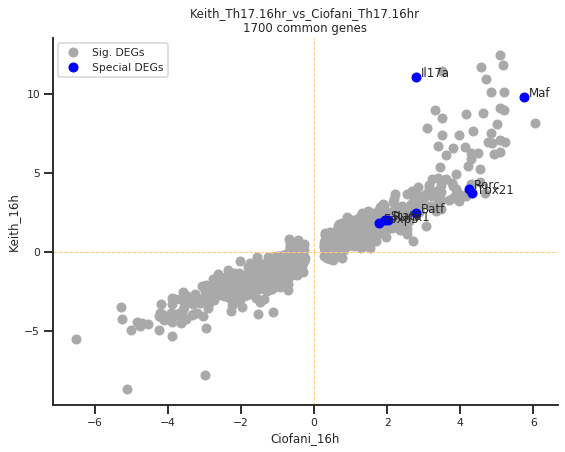

In [8]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
%matplotlib inline


#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.65)


fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1, 1, 1)

ax.plot(de_genes['Ciofani_16h'].values, 
            de_genes['Keith_16h'].values, 'o', color='darkgray', label='Sig. DEGs')

for x, y, t in zip(sig_genes['Ciofani_16h'].values,
                       sig_genes['Keith_16h'].values, 
                       sig_genes['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')

ax.plot(sig_genes['Ciofani_16h'].values, 
            sig_genes['Keith_16h'].values, 'o', color='blue', label='Special DEGs')


#plt.scatter(de_genes.Ciofani_16h,de_genes.Keith_16h,color='blue')
#plt.scatter(sig_genes.Ciofani_16h,sig_genes.Keith_16h,color= 'red')
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

plt.xlabel('Ciofani_16h')
plt.ylabel('Keith_16h')
plt.legend()
sns.despine(fig,ax)

#simpleaxis(ax)
plt.tight_layout()
plt.title('Keith_Th17.16hr_vs_Ciofani_Th17.16hr\n%d common genes' % (len(de_genes)+len(sig_genes)))

plt.axhline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
plt.axvline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
plt.savefig('/data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Correlation_RNAseq_KeithTh1716hr_CiofaniTh1716hr.pdf')
plt.show()

Scatterplot for 48hr

In [10]:
special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']

sig_genes_48 = Keith_Th17_48h[Keith_Th17_48h.GeneName.isin(special_genes)].merge(Ciofani_Th17_48h[Ciofani_Th17_48h.GeneName.isin(special_genes)], 
                                                                              on = 'GeneName', how = 'inner')


sig_genes_48.drop(columns = ['baseMean_x', 'baseMean_y', 'lfcSE_x','lfcSE_y','pvalue_x','pvalue_y','GeneType_x','GeneType_y','Unnamed: 0_x','Unnamed: 0_y','padj_x','padj_y'], inplace = True)
        
sig_genes_48 = sig_genes_48[['GeneName', 'log2FoldChange_x', 'log2FoldChange_y']]
sig_genes_48 = sig_genes_48.rename(columns = {'log2FoldChange_x': 'Keith_48h', 
                            'log2FoldChange_y': 'Ciofani_48h'})

#sig_genes = sig_genes.set_index('GeneName')
#sig_genes.index.names = [None] 
sig_genes_48


#sig_genes.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/SpecialGenes_Keith_Ciofani.txt',sep='\t',index=False)

,GeneName,Keith_48h,Ciofani_48h
0,Il17a,12.795124,3.192524
1,Rorc,1.784552,1.848663
2,Maf,9.241520,5.348350
3,Stat3,0.798560,0.809046
4,Irf4,0.644946,0.762833
5,Tbx21,1.375261,2.281787


In [11]:
Keith_Th17_48h[Keith_Th17_48h.GeneName.isin(special_genes)]

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName,GeneType
0,ENSMUSG00000025929.4,41424.207125,12.795124,0.239154,53.501568,0.000000e+00,0.000000e+00,Il17a,protein_coding
106,ENSMUSG00000028150.14,7365.504922,1.784552,0.043667,40.867056,0.000000e+00,0.000000e+00,Rorc,protein_coding
134,ENSMUSG00000055435.6,9155.046249,9.241520,0.121231,76.230739,0.000000e+00,0.000000e+00,Maf,protein_coding
260,ENSMUSG00000030745.9,11100.068576,-1.198285,0.037573,-31.891932,3.454558e-223,1.444032e-221,Il21r,protein_coding
624,ENSMUSG00000004040.16,25218.874477,0.798560,0.037050,21.553787,4.878922e-103,8.516646e-102,Stat3,protein_coding
702,ENSMUSG00000021356.9,50084.096468,0.644946,0.031091,20.743892,1.391937e-95,2.160175e-94,Irf4,protein_coding
940,ENSMUSG00000034266.5,5251.176613,0.814547,0.044674,18.233240,2.811602e-74,3.259785e-73,Batf,protein_coding
1498,ENSMUSG00000022952.16,4209.407968,0.629648,0.043816,14.370237,7.955821e-47,5.790394e-46,Runx1,protein_coding
2578,ENSMUSG00000039521.12,203.159173,2.236775,0.211930,10.554332,4.850767e-26,2.052031e-25,Foxp3,protein_coding
3675,ENSMUSG00000001444.2,298.834623,1.375261,0.167953,8.188385,2.647553e-16,7.857673e-16,Tbx21,protein_coding


In [12]:
Ciofani_Th17_48h[Ciofani_Th17_48h.GeneName.isin(special_genes)]

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,pvalue,padj,GeneName,GeneType
231,ENSMUSG00000028150.14,2115.869918,1.848663,0.288913,4.509637e-12,2.203502e-10,Rorc,protein_coding
406,ENSMUSG00000055435.6,2038.707247,5.348350,1.241277,4.029380e-08,1.122286e-06,Maf,protein_coding
426,ENSMUSG00000001444.2,180.194902,2.281787,0.475787,8.030819e-08,2.132022e-06,Tbx21,protein_coding
887,ENSMUSG00000004040.16,13521.297712,0.809046,0.264791,1.184768e-04,1.512447e-03,Stat3,protein_coding
981,ENSMUSG00000021356.9,23716.173770,0.762833,0.263055,2.275945e-04,2.625407e-03,Irf4,protein_coding
1001,ENSMUSG00000025929.4,10171.633248,3.192524,2.092920,2.664535e-04,3.014487e-03,Il17a,protein_coding


In [13]:
de_genes_48 = Keith_Th17_48h[~Keith_Th17_48h.GeneName.isin(special_genes)].merge(Ciofani_Th17_48h[~Ciofani_Th17_48h.GeneName.isin(special_genes)], on = 'GeneName')

de_genes_48.drop(columns = ['baseMean_x', 'baseMean_y', 'lfcSE_x','lfcSE_y','pvalue_x','pvalue_y','GeneType_x','GeneType_y','padj_x','padj_y', 'Unnamed: 0_x', 'Unnamed: 0_y'], inplace = True)
        
de_genes_48 = de_genes_48[['GeneName', 'log2FoldChange_x', 'log2FoldChange_y']]
de_genes_48 = de_genes_48.rename(columns = {'log2FoldChange_x': 'Keith_48h', 
                           'log2FoldChange_y': 'Ciofani_48h'})

#sig_genes = sig_genes.set_index('GeneName')
#sig_genes.index.names = [None] 
de_genes_48

#de_genes.to_csv('/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/DEGenes_Keith_Ciofani.txt',sep='\t',index=False)

,GeneName,Keith_48h,Ciofani_48h
0,Timp2,2.845244,-0.896478
1,Dnmt3a,-2.395463,-2.056518
2,Id2,5.238303,2.273762
3,Ahr,3.215856,3.430722
4,Egln3,6.291331,4.184094
...,...,...,...
950,Plaur,-0.414537,3.248621
951,Plk1,-0.106458,-0.872713
952,Noc3l,0.111219,-0.882625
953,Unc119b,-0.103385,1.322299


In [14]:
len(de_genes_48)+len(sig_genes_48)

961

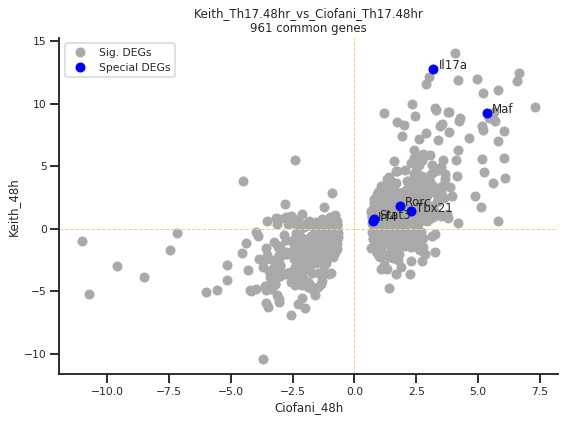

In [16]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
%matplotlib inline


#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context('talk', font_scale=0.65)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1, 1, 1)

ax.plot(de_genes_48['Ciofani_48h'].values, 
            de_genes_48['Keith_48h'].values, 
            'o', color='darkgray', label='Sig. DEGs')

for x, y, t in zip(sig_genes_48['Ciofani_48h'].values,
                       sig_genes_48['Keith_48h'].values, 
                       sig_genes_48['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')

ax.plot(sig_genes_48['Ciofani_48h'].values, 
            sig_genes_48['Keith_48h'].values, 
            'o', color='blue', label='Special DEGs')


#plt.scatter(de_genes.Ciofani_16h,de_genes.Keith_16h,color='blue')
#plt.scatter(sig_genes.Ciofani_16h,sig_genes.Keith_16h,color= 'red')
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

plt.xlabel('Ciofani_48h')
plt.ylabel('Keith_48h')
plt.title('Keith_Th17.48hr_vs_Ciofani_Th17.48hr\n%d common genes' % (len(de_genes_48)+len(sig_genes_48)))
plt.legend()
sns.despine(fig,ax)

#simpleaxis(ax)
plt.tight_layout()

plt.axhline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
plt.axvline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
plt.savefig('/data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Correlation_RNAseq_KeithTh1748hr_CiofaniTh1748hr.pdf')
plt.show()

In [82]:
features = ['Keith_16h', 'Ciofani_16h']
# Separating out the features
x = sig_genes.loc[:, features].values
# Separating out the target
y = sig_genes.loc[:,['GeneName']].values

x

array([[ 2.47254605,  2.80269902],
       [ 2.04666979,  1.96249729],
       [ 1.99434086,  2.04599608],
       [ 3.98962535,  4.26593736],
       [ 9.77535426,  6.48720932],
       [ 3.69909309,  4.59509424],
       [11.03469787,  3.24565698]])

In [83]:
import numpy as np

features = x.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[14.34649174,  3.53389928],
       [ 3.53389928,  2.60354084]])

In [84]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([15.32794764,  1.62208494])

In [85]:
vectors[:5]

array([[ 0.96353076, -0.2675976 ],
       [ 0.2675976 ,  0.96353076]])

In [86]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.9043019575944139, 0.0956980424055861]


In [87]:
projected_1 = x.dot(vectors.T[0])
projected_2 = x.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res

,PC1,PC2,Y
0,3.132370,2.038839,Batf
1,2.497189,1.343243,Stat3
2,2.469112,1.437699,Runx1
3,4.985681,3.042748,Rorc
4,11.154816,3.634764,Maf
5,4.793826,3.437646,Tbx21
6,11.500801,0.174432,Il17a


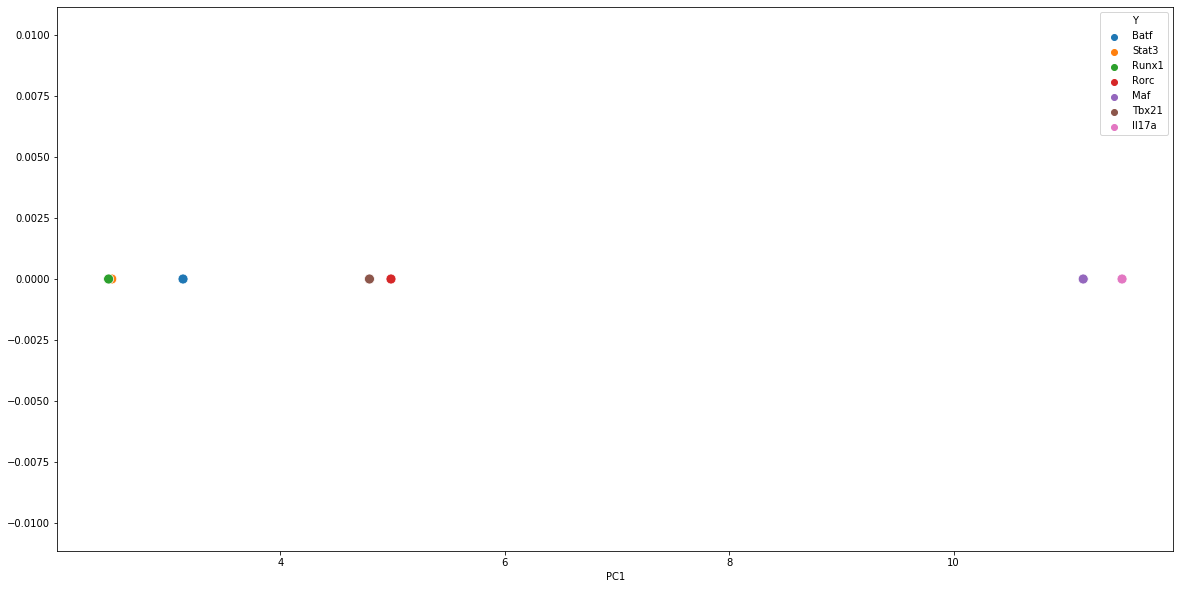

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=100)

R code for PCA

In [3]:
df <- read.table("/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/DEGenes_Keith_Ciofani.txt", header = TRUE)

print(df)

  Keith_16h Ciofani_16h
1  2.472546    2.802699
2  2.046670    1.962497
3  1.994341    2.045996
4  3.989625    4.265937
5  9.775354    6.487209
6  3.699093    4.595094
7 11.034698    3.245657


In [6]:
df.pca <- prcomp(df[,2:3])
print(df.pca)


Standard deviations:
[1] 3.915092 1.273611

Rotation:
                  PC1        PC2
Keith_16h   0.9635308 -0.2675976
Ciofani_16h 0.2675976  0.9635308


In [7]:
print(summary(df.pca))

Importance of components:
                          PC1    PC2
Standard deviation     3.9151 1.2736
Proportion of Variance 0.9043 0.0957
Cumulative Proportion  0.9043 1.0000


In [3]:
library(ggfortify)

#Features <- list(Keith_16h, Ciofani_16h)

pca.plot <- autoplot(df.pca, data = df, colour = 'GeneName')
pca.plot

ERROR: Error in autoplot(df.pca, data = df, colour = "GeneName"): object 'df.pca' not found
